# STA130 HW08 - Gabriel George (not using ChatGPT, cannot get chat link)

## Pre-lecture

### 1. Start a ChatBot session to understand what a *Classification Decision Tree* is: (a) ask the ChatBot to describe the type of problem a *Classification Decision Tree* addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a *Classification Decision Tree* makes *(classification) predictions* versus how *Multiple Linear Regression* makes *(regression) predictions*

A Classification Decision Tree addresses problems where we need to categorize or classify items into distinct groups based on their characteristics. It's particularly useful for:

1. Medical diagnosis - predicting whether a patient has a specific condition (yes/no) based on symptoms
2. Customer behavior - predicting if a customer will churn or stay
3. Email filtering - classifying emails as spam or not spam
4. Loan approval - determining if an applicant is high or low risk

The key difference in how these methods make predictions:

Classification Decision Trees:
- Make categorical predictions (like yes/no, high/medium/low)
- Work by splitting data into branches based on simple yes/no questions about features
- Each split creates more homogeneous groups
- Final prediction is the most common category in the leaf node reached

Multiple Linear Regression:
- Makes continuous numerical predictions (like price, temperature, score)
- Works by finding the best-fit line/plane through the data
- Uses a mathematical equation combining weighted features
- Final prediction is a calculated number based on the equation

Would you like me to clarify any of these points further?

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following *metrics* below: provide your answers and, in your own words, *concisely explain your rationale for your answers.*<br>


1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
    
2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

3. **Specificity** measures the proportion of actual negatives that are correctly identified.

$$\text{Specificity} = \frac{TN}{TN + FP}$$

4. **Precision** measures the proportion of positive identifications that were actually correct.

$$\text{Precision} = \frac{TP}{TP + FP}$$

1. **Accuracy** 
Definition: Overall correctness of all predictions.
Example: Email Spam Filter
- Good metric when both types of errors are equally important
- In spam filtering, misclassifying legitimate emails as spam is just as bad as letting spam through
- Rationale: Want to measure overall performance in correctly identifying both spam and non-spam

2. **Sensitivity**
Definition: Ability to detect all positive cases
Example: Cancer Screening
- Critical when missing a positive case is very dangerous
- Would rather have false alarms than miss actual cancer cases
- Rationale: The cost of missing a cancer diagnosis is much higher than the cost of additional testing

3. **Specificity**
Definition: Ability to correctly identify negative cases
Example: Criminal Justice System
- Important when falsely accusing innocents must be avoided
- "Innocent until proven guilty" principle
- Rationale: The cost of wrongly convicting an innocent person is considered worse than letting a guilty person go free

4. **Precision**
Definition: Reliability of positive predictions
Example: Product Recommendations
- Important when false positives are costly or annoying
- Don't want to recommend products customers won't like
- Rationale: Better to make fewer but more accurate recommendations than many incorrect ones that might annoy customers

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard *exploratory data analysis (EDA)* and data summarization after pre-processing the dataset to meet the requirements below<br>

 1. remove `Weight_oz`, `Width`, and `Height` 
 2. drop all remaining rows with `NaN` entries 
 3. set `Pub year` and `NumPages` to have the type `int`, and `Hard_or_Paper` to have the type `category`

Dataset Shape: (319, 10)

Column Types:
Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object

Basic Summary Statistics:
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min      1.500000      0.770000   24.000000  1936.000000    0.100000
25%     13.890000      8.600000  208.000000  1998.000000    0.600000
50%     15.000000     10.200000  320.000000  2005.000000    0.900000
75%     19.360000     12.560000  416.000000  2010.000000    1.100000
max    139.950000    139.950000  896.000000  2011.000000    2.100000

Distribution of Hard_or_Paper:
Hard_o

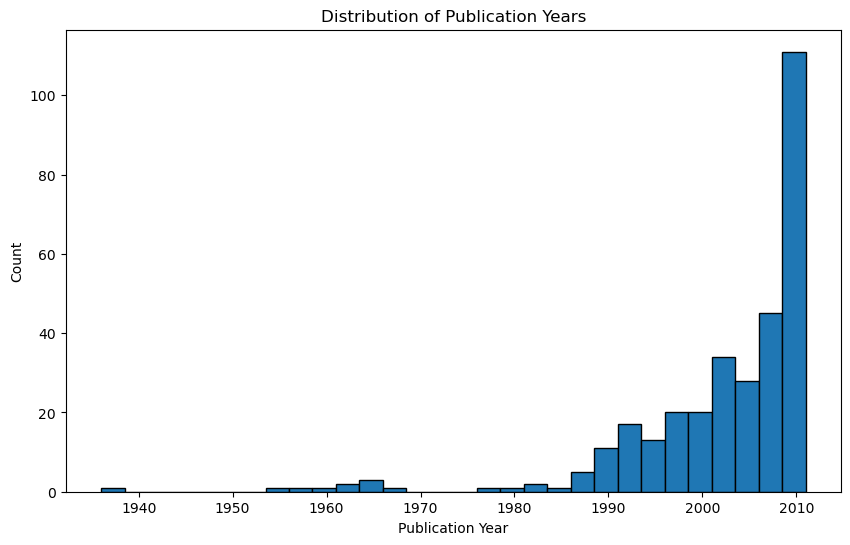

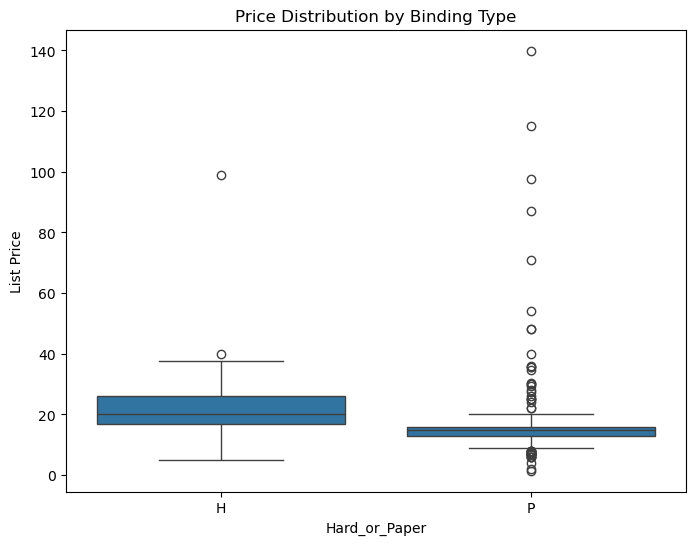

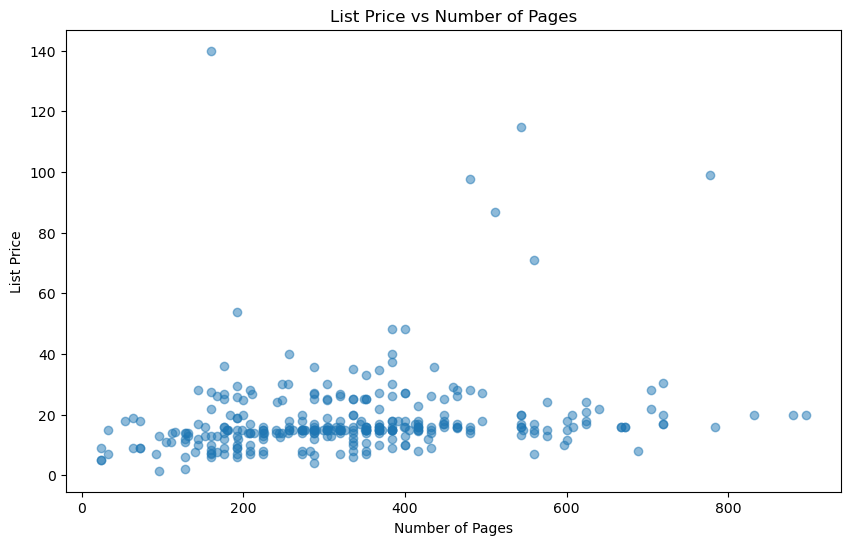

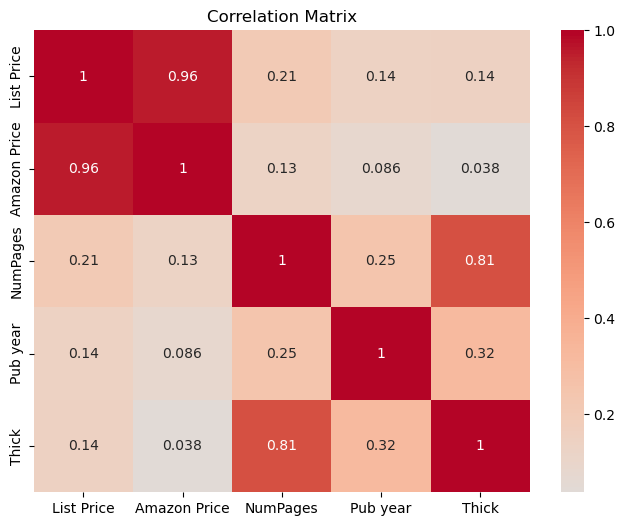

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Create reduced dataset per specifications
ab_reduced_noNaN = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Convert types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Basic EDA
print("Dataset Shape:", ab_reduced_noNaN.shape)
print("\nColumn Types:")
print(ab_reduced_noNaN.dtypes)
print("\nBasic Summary Statistics:")
print(ab_reduced_noNaN.describe())

# Distribution of categorical variables
print("\nDistribution of Hard_or_Paper:")
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())
print("\nDistribution of Hard_or_Paper (percentages):")
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts(normalize=True) * 100)

# Visualize publication year distribution
plt.figure(figsize=(10, 6))
plt.hist(ab_reduced_noNaN['Pub year'], bins=30, edgecolor='black')
plt.title('Distribution of Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.show()

# Boxplot of prices by binding type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hard_or_Paper', y='List Price', data=ab_reduced_noNaN)
plt.title('Price Distribution by Binding Type')
plt.show()

# Scatter plot of pages vs price
plt.figure(figsize=(10, 6))
plt.scatter(ab_reduced_noNaN['NumPages'], ab_reduced_noNaN['List Price'], alpha=0.5)
plt.title('List Price vs Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('List Price')
plt.show()

# Correlation matrix
correlation_matrix = ab_reduced_noNaN.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

### 4. Create an 80/20 split with 80% of the data as a training set *ab_reduced_noNaN_train* and 20% of the data testing set  *ab_reduced_noNaN_test* using either *df.sample(...)* as done in TUT or using *train_test_split(...)* as done in the previous HW, and report on how many observations there are in the training data set and the test data set.<br><br>Tell a ChatBot that you are about to fit a "scikit-learn" *DecisionTreeClassifier* model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree *clf* using only the *List Price* variable to predict whether or not a book is a hard cover or paper back book using a *max_depth* of *2*; finally use *tree.plot_tree(clf)* to explain what *predictions* are made based on *List Price* for the fitted *clf* model

```python
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]
```

Training set size: 255
Test set size: 64


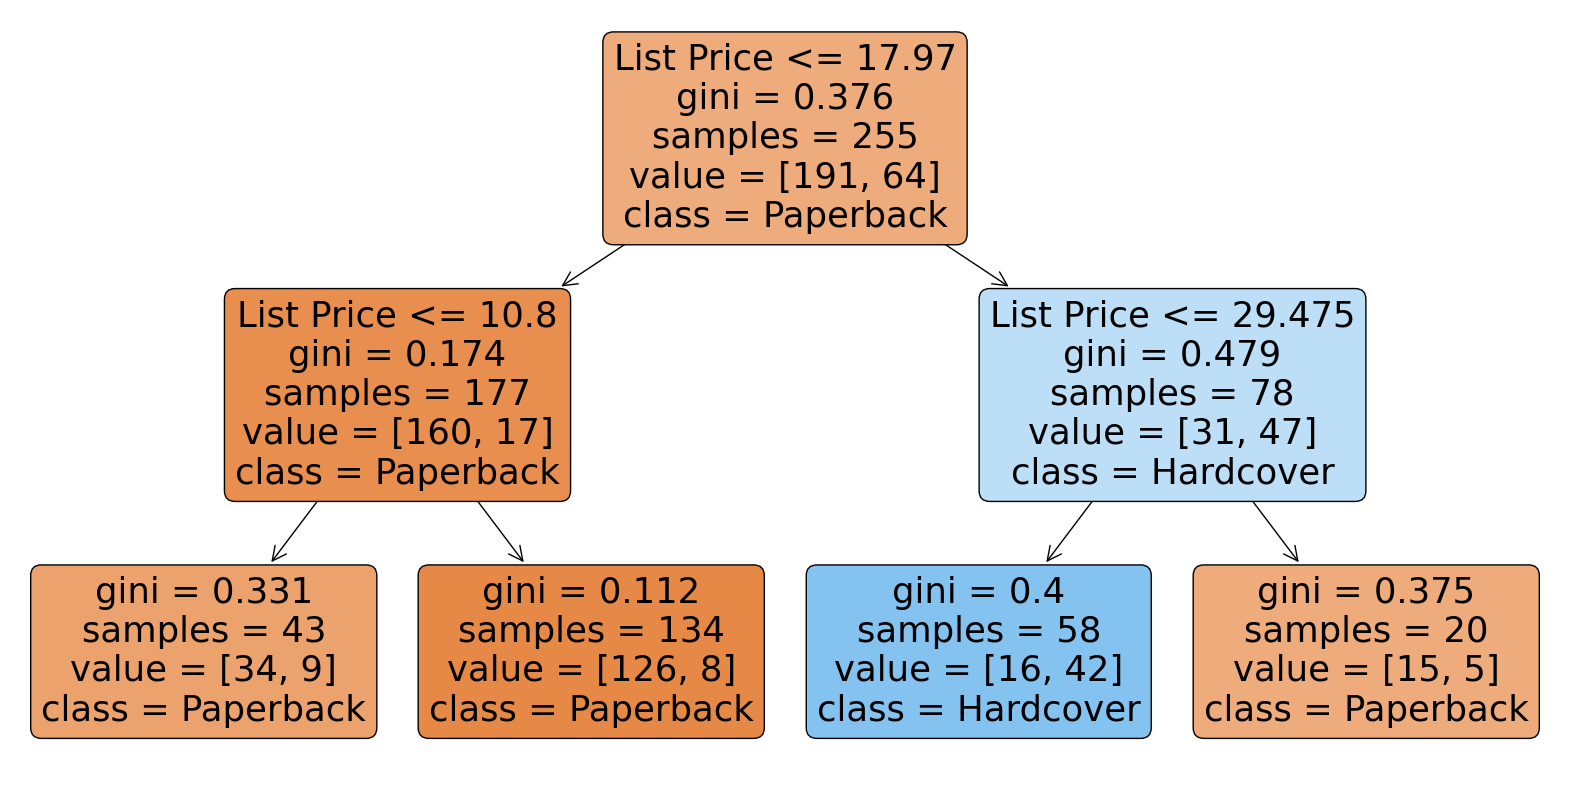

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz

# Set random seed for reproducibility
np.random.seed(130)

# Create binary target variable and feature matrix
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Create 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130)

# Print sizes of training and test sets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

# Create and train the decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)

# Basic visualization
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=['List Price'], 
               class_names=['Paperback', 'Hardcover'],
               filled=True, rounded=True)
plt.show()

# No graphviz visualization needed

## Post-lecture

### 5. Repeat the previous problem but this time visualize the *classification decision tree* based on the following specifications below; then explain generally how predictions are made for the *clf2* model<br>

1. `X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]`
2. `max_depth` set to `4`

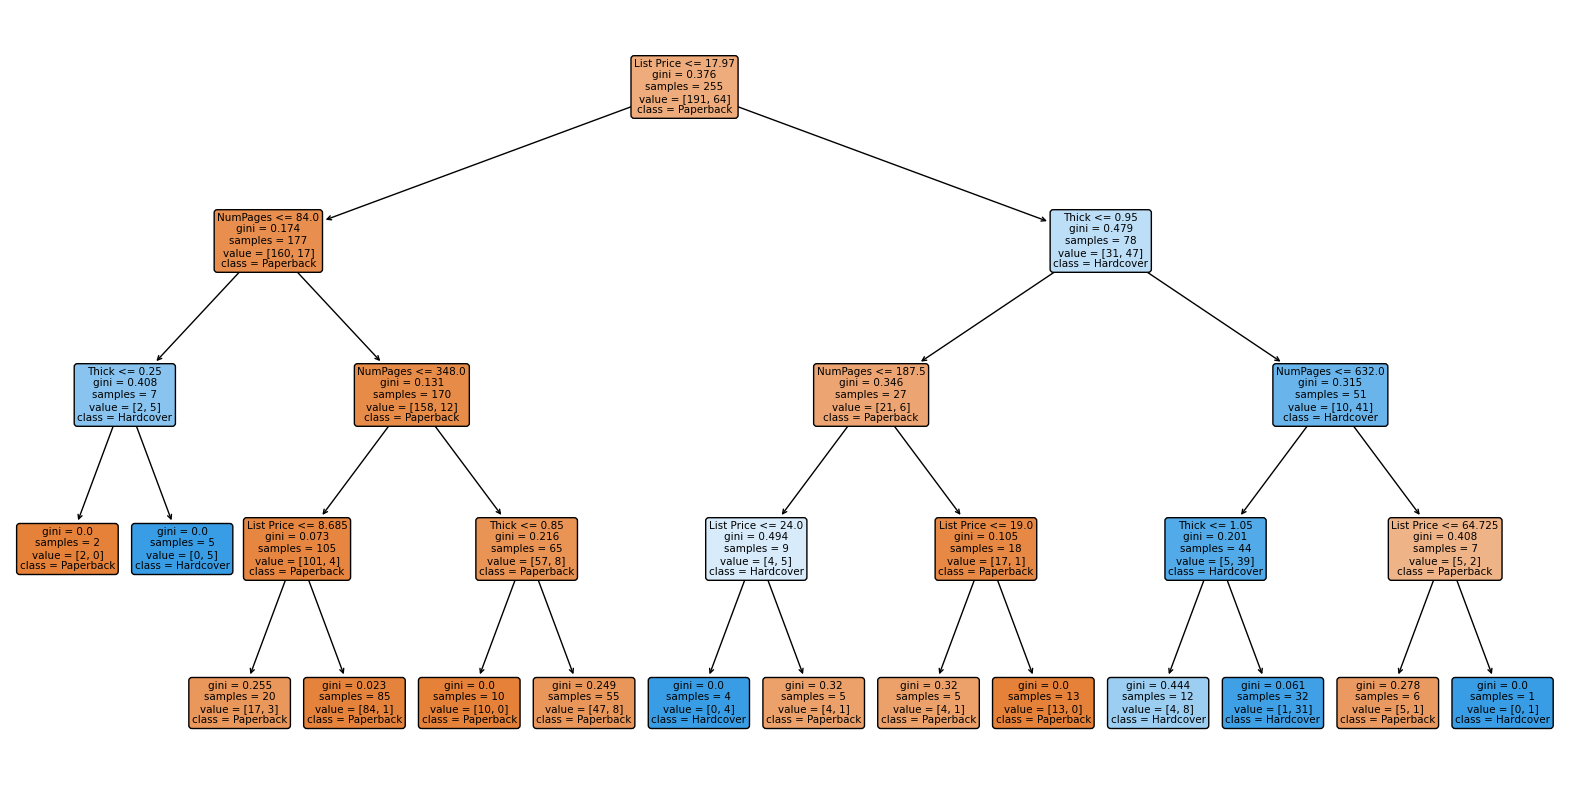


Feature Importances:
      feature  importance
2  List Price    0.519524
1       Thick    0.266007
0    NumPages    0.214470


In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set random seed for reproducibility (same as before)
np.random.seed(130)

# Create target variable and new feature matrix with multiple predictors
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Create 80-20 train-test split (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130)

# Create and train the second decision tree classifier
clf2 = tree.DecisionTreeClassifier(max_depth=4)
clf2 = clf2.fit(X_train, y_train)

# Visualization
plt.figure(figsize=(20,10))
tree.plot_tree(clf2, 
               feature_names=['NumPages', 'Thick', 'List Price'],
               class_names=['Paperback', 'Hardcover'],
               filled=True, 
               rounded=True)
plt.show()

# Print feature importances
importance = pd.DataFrame({
    'feature': ['NumPages', 'Thick', 'List Price'],
    'importance': clf2.feature_importances_
})
print("\nFeature Importances:")
print(importance.sort_values('importance', ascending=False))

#### Explanation
The tree will now make predictions by:

1. Starting at the top node
2. Following the appropriate path based on the values of NumPages, Thick, and List Price
3. Making a final prediction (Paperback or Hardcover) at the leaf nodes

### 6. Use previously created *ab_reduced_noNaN_test* to create confusion matrices for *clf* and *clf2*. Report the sensitivity, specificity and accuracy for each of the models<br>

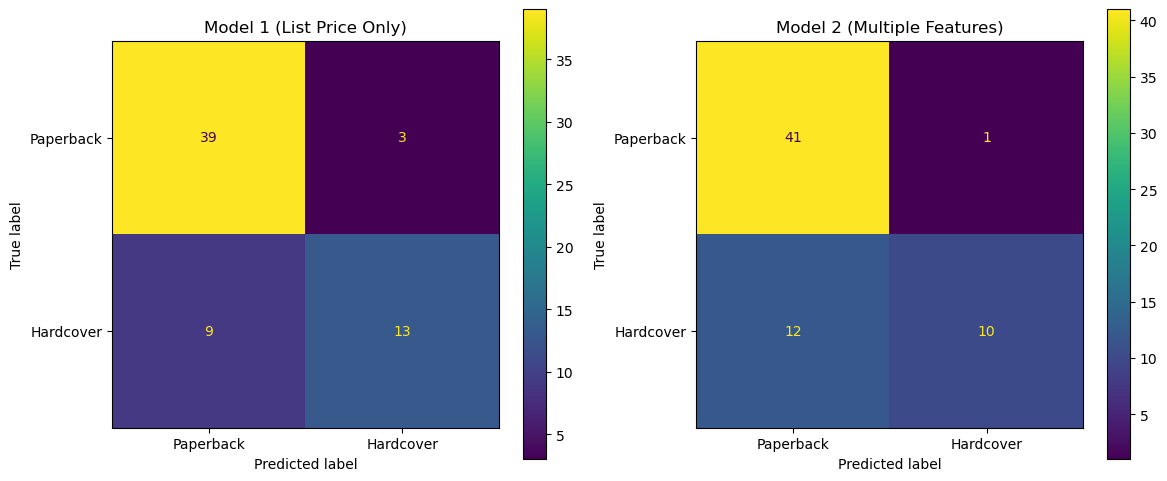


Model 1 (List Price Only) Metrics:
Sensitivity: 0.591
Specificity: 0.929
Accuracy: 0.812

Model 2 (Multiple Features) Metrics:
Sensitivity: 0.455
Specificity: 0.976
Accuracy: 0.797


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions from both models
y_pred_clf = clf.predict(X_test[['List Price']])
y_pred_clf2 = clf2.predict(X_test[['NumPages', 'Thick', 'List Price']])

# Create confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Calculate metrics for clf
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()
sensitivity_clf = np.round(tp_clf / (tp_clf + fn_clf), 3)
specificity_clf = np.round(tn_clf / (tn_clf + fp_clf), 3)
accuracy_clf = np.round((tp_clf + tn_clf) / (tp_clf + tn_clf + fp_clf + fn_clf), 3)

# Calculate metrics for clf2
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()
sensitivity_clf2 = np.round(tp_clf2 / (tp_clf2 + fn_clf2), 3)
specificity_clf2 = np.round(tn_clf2 / (tn_clf2 + fp_clf2), 3)
accuracy_clf2 = np.round((tp_clf2 + tn_clf2) / (tp_clf2 + tn_clf2 + fp_clf2 + fn_clf2), 3)

# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for clf
ConfusionMatrixDisplay(confusion_matrix=cm_clf, 
                      display_labels=['Paperback', 'Hardcover']).plot(ax=ax1)
ax1.set_title('Model 1 (List Price Only)')

# Plot for clf2
ConfusionMatrixDisplay(confusion_matrix=cm_clf2, 
                      display_labels=['Paperback', 'Hardcover']).plot(ax=ax2)
ax2.set_title('Model 2 (Multiple Features)')
plt.tight_layout()
plt.show()

# Print metrics
print("\nModel 1 (List Price Only) Metrics:")
print(f"Sensitivity: {sensitivity_clf}")
print(f"Specificity: {specificity_clf}")
print(f"Accuracy: {accuracy_clf}")

print("\nModel 2 (Multiple Features) Metrics:")
print(f"Sensitivity: {sensitivity_clf2}")
print(f"Specificity: {specificity_clf2}")
print(f"Accuracy: {accuracy_clf2}")

### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for *clf* and *clf2*) are better<br>

```python
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
```


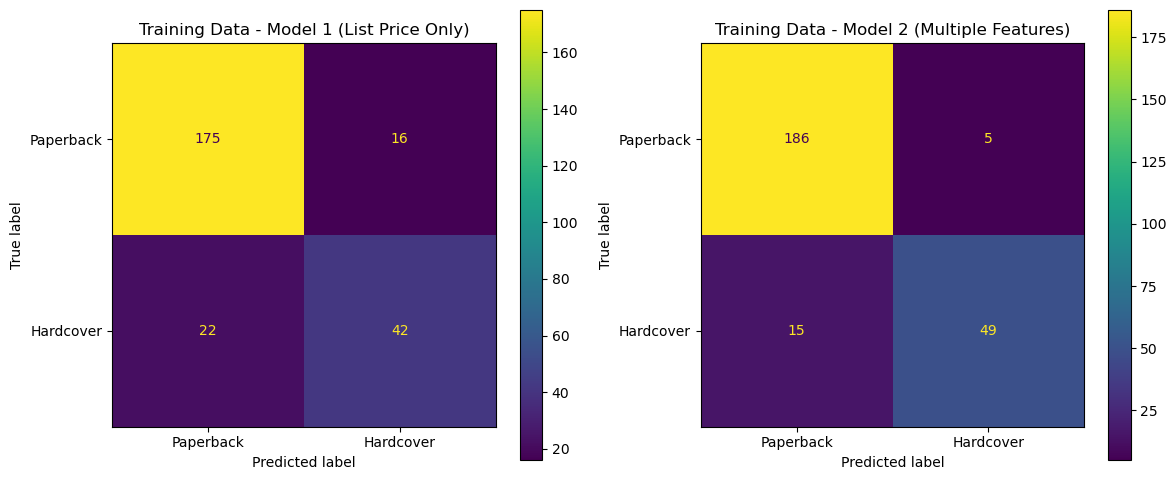

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions on training data
train_pred_clf = clf.predict(X_train[['List Price']])
train_pred_clf2 = clf2.predict(X_train[['NumPages', 'Thick', 'List Price']])

# Create confusion matrices for training data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for clf on training data
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_train, train_pred_clf),
    display_labels=['Paperback', 'Hardcover']
).plot(ax=ax1)
ax1.set_title('Training Data - Model 1 (List Price Only)')

# Plot for clf2 on training data
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_train, train_pred_clf2),
    display_labels=['Paperback', 'Hardcover']
).plot(ax=ax2)
ax2.set_title('Training Data - Model 2 (Multiple Features)')

plt.tight_layout()
plt.show()

The main difference between these confusion matrices is that Model 2 (with multiple features) shows better performance on the training data than Model 1 (List Price only). This is evident by looking at the off-diagonal elements: Model 2 has fewer misclassifications (5 paperbacks misclassified as hardcover versus 16 in Model 1, and 15 hardcovers misclassified as paperback versus 22 in Model 1). However, our earlier test data confusion matrices were better because they show us how well the models perform on unseen data, which is a more realistic measure of their true predictive ability, rather than how well they can fit the training data they've already seen.


### 8. Read the paragraphs in *Further Guidance* and ask a ChatBot how to visualize *feature Importances* available for *scikit-learn* *classification decision trees*; do so for *clf2*;  and use *.feature_names_in_* corresponding to *.feature_importances_* to report which *predictor variable* is most important for making predictions according to *clf2*<br>

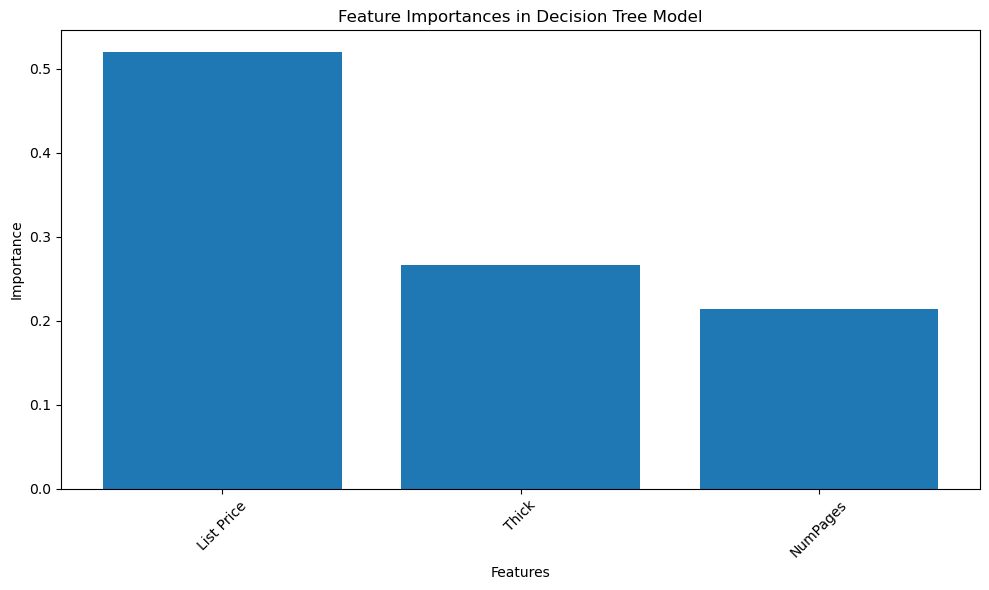


Feature Importances:
      feature  importance
2  List Price    0.519524
1       Thick    0.266007
0    NumPages    0.214470

Most important predictor: List Price
Importance score: 0.520


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create DataFrame of feature importances
feature_importance = pd.DataFrame({
    'feature': clf2.feature_names_in_,
    'importance': clf2.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importances in Decision Tree Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print feature importances
print("\nFeature Importances:")
print(feature_importance)

# Print most important feature
most_important = feature_importance.iloc[0]
print(f"\nMost important predictor: {most_important['feature']}")
print(f"Importance score: {most_important['importance']:.3f}")

### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences<br>

Linear regression coefficients directly show the magnitude and direction of each variable's effect on the prediction (e.g., a coefficient of 2 means for each one-unit increase in that variable, the predicted value increases by 2 units, assuming all other variables stay constant). In contrast, decision tree feature importances only show the relative contribution or importance of each variable to the model's predictions (on a scale from 0 to 1 summing to 1), but don't tell us anything about the direction of the relationship or how changes in the variable affect the prediction.

### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes. It has been quite helpful. Although I think that I will need to review it multiple times to fully grasp the concepts.

### ChatBot Summary 
I did not use chatgpt and the bot I used does not allow for links to share the chat. Here is the chat summary:
Here's a summary of what we covered in our discussion about Classification Decision Trees:

1. **Basic Concepts and Data Preparation**
   - Created an 80/20 train-test split of the Amazon books dataset
   - Preprocessed data by handling categorical variables and removing unnecessary features

2. **Simple Decision Tree (clf)**
   - Built a basic model using only List Price to predict book binding type (Hardcover vs Paperback)
   - Used max_depth=2 for simplicity
   - Visualized the decision tree structure

3. **Complex Decision Tree (clf2)**
   - Created a more complex model using multiple features (NumPages, Thick, List Price)
   - Used max_depth=4 for more detailed predictions
   - Compared its structure to the simpler model

4. **Model Evaluation**
   - Created confusion matrices for both models
   - Calculated and compared performance metrics:
     - Sensitivity (true positive rate)
     - Specificity (true negative rate)
     - Accuracy (overall correct predictions)
   - Discussed differences between training and testing performance

5. **Feature Importance**
   - Examined how decision trees determine feature importance
   - Visualized the relative importance of each predictor
   - Contrasted this with linear regression coefficients:
     - Linear regression coefficients show magnitude and direction of relationships
     - Decision tree importance scores show relative contribution (0-1) without direction

Would you like me to elaborate on any of these topics?